> Problem Statement : The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

> 1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
> 2. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

> Customer profiling and analysis to provide a better recommendation of treadmills to the new customers.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


> ## Outlier Percentage

In [69]:
def iqr_calc(df) : 
    iqr = []
    range = []
    outlier_per = []
    for column in df.describe().columns :       
        iqr_value = df.describe()[column]['75%'] - df.describe()[column]['25%']
        range_value = df.describe()[column]['max'] - df.describe()[column]['min']

        outlier_percentage_values = max( (1 - ((iqr_value*4) / range_value) )*100, 0 )    

        iqr.append(iqr_value)
        range.append(range_value)
        outlier_per.append(outlier_percentage_values)

    iqr_df = pd.DataFrame({'Attributes' : df.describe().columns,
                            'iqr' : iqr,
                            'range' : range,
                            'outlier_percentage(%)' : outlier_per})
    return iqr_df
iqr_calc(df)

,Attributes,iqr,range,outlier_percentage(%)
0,Age,9.00,32.0,0.000000
1,Education,2.00,9.0,11.111111
2,Usage,1.00,5.0,20.000000
3,Fitness,1.00,4.0,0.000000
4,Income,14609.25,75019.0,22.103734
5,Miles,48.75,339.0,42.477876


`Here we have used the iqr rule such that any values below (Q1 - 1.5*IQR) and above (Q3 + 1.5*IQR) would be considered as Outliers.`

> Thus for the whole dataset, Miles contains the most outliers or also from the std values in describe dataframe, Miles is th most deviated column. Fitness and Age do not contain that much of outliers. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


So, the dataset has 0 null values

In [5]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


So, most of the people are going for KP281.

In [6]:
df.shape

(180, 9)

> ## Product Type 

In [7]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

> ## Product Variation

[Text(0.5, 0, 'Products'), Text(0, 0.5, 'Purchase Probabilities')]

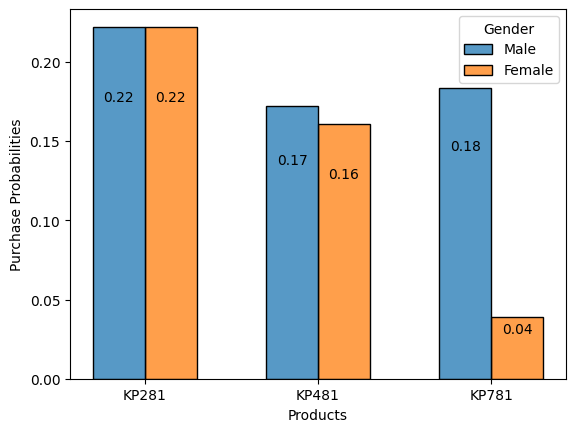

In [8]:
ax = sns.histplot(data = df, x = 'Product', hue = 'Gender', stat = 'probability', multiple = 'dodge', shrink = 0.6)
for p in ax.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w / 2., h*0.8)
    text = f'{h:0.2f}'
    ax.annotate(text=text, xy=xy, ha='center', va='center')

ax.set(xlabel='Products', ylabel='Purchase Probabilities')
#plt.show()

[Text(0.5, 0, 'Products'), Text(0, 0.5, 'Purchase Probabilities')]

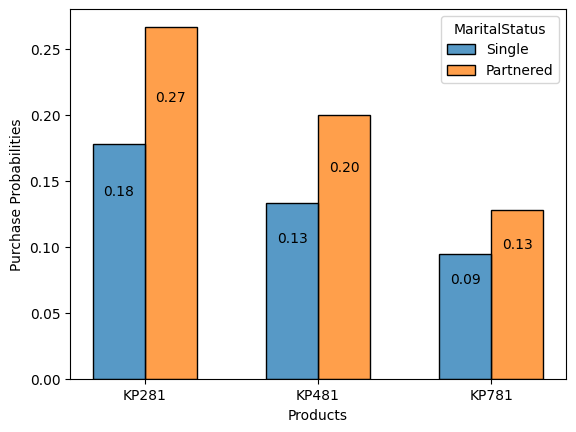

In [9]:
ax = sns.histplot(data = df, x = 'Product', hue = 'MaritalStatus', stat = 'probability', multiple = 'dodge', shrink = 0.6)
for p in ax.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w / 2., h*0.8)
    text = f'{h:0.2f}'
    ax.annotate(text=text, xy=xy, ha='center', va='center')

ax.set(xlabel='Products', ylabel='Purchase Probabilities')

> Thus we can see that partnered people are more prone to buying the products, with KP281 haveing the heighest selling probabilities.

> ## Contingency Table and Marginal Probabilities

In [10]:
pd.crosstab(index=df['MaritalStatus'], columns=df['Gender'], margins=True)

Gender,Female,Male,All
MaritalStatus,,,
Partnered,46,61,107
Single,30,43,73
All,76,104,180


In [11]:
print('Partnered Buyers : 107/180 ie. ',round((107/180)* 100,2),' %')
print('Single Buyers : (1 - (107/180) ) ie. ',round((73/180)*100, 2),' %')
print('Male Buyers : 104/180 ie. ',round((104/180)*100,2),' %')
print('Female Buyers : 1 - 104/180 ie. ',round((76/180)*100,2),' %')

Partnered Buyers : 107/180 ie.  59.44  %
Single Buyers : (1 - (107/180) ) ie.  40.56  %
Male Buyers : 104/180 ie.  57.78  %
Female Buyers : 1 - 104/180 ie.  42.22  %


> ## Univariate Analysis

In [12]:
df281 = df[df['Product'] == 'KP281']
df481 = df[df['Product'] == 'KP481']
df781 = df[df['Product'] == 'KP781']

> ## Based on Income

e:\GitHub_Repos\ML_Models\models_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\GitHub_Repos\ML_Models\models_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\GitHub_Repos\ML_Models\models_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

Text(0.5, 1.0, 'Product : KP781')

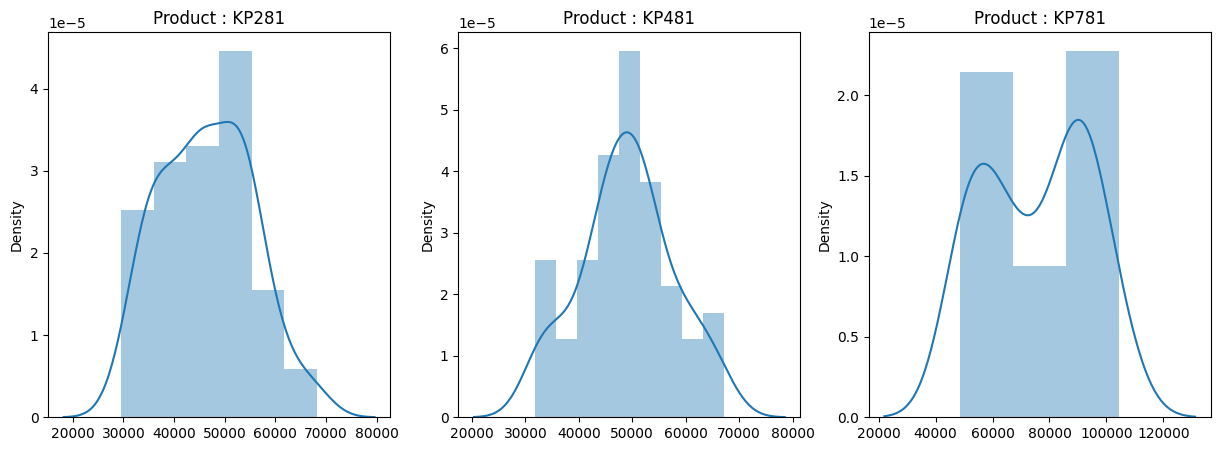

In [13]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.distplot(ax = axes[0], x=df281['Income'])
axes[0].set_title('Product : KP281')

sns.distplot(ax = axes[1], x=df481['Income'])
axes[1].set_title('Product : KP481')

sns.distplot(ax = axes[2], x=df781['Income'])
axes[2].set_title('Product : KP781')

> ## Based on Age

e:\GitHub_Repos\ML_Models\models_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\GitHub_Repos\ML_Models\models_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\GitHub_Repos\ML_Models\models_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

Text(0.5, 1.0, 'Product : KP781')

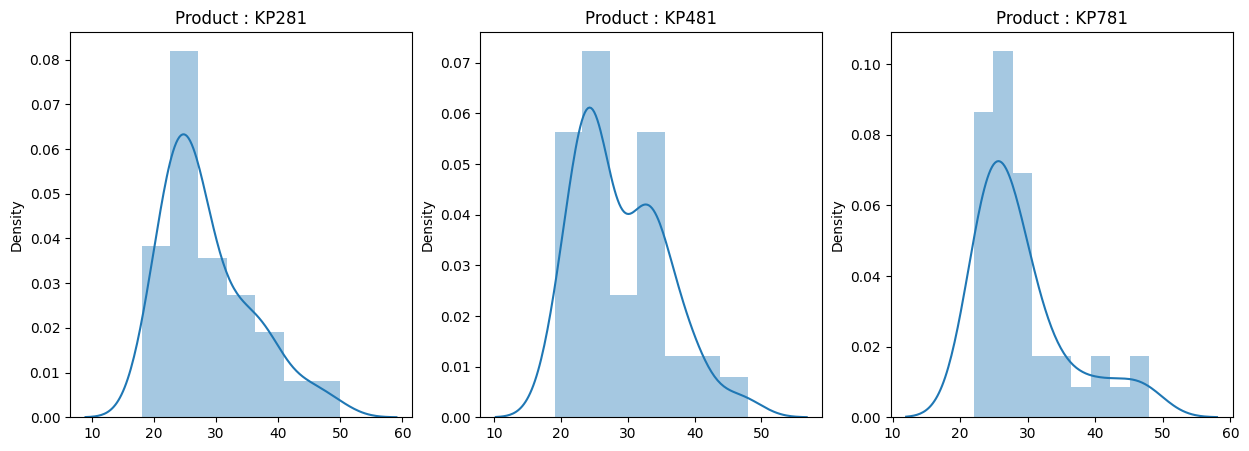

In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.distplot(ax = axes[0], x=df281['Age'])
axes[0].set_title('Product : KP281')

sns.distplot(ax = axes[1], x=df481['Age'])
axes[1].set_title('Product : KP481')

sns.distplot(ax = axes[2], x=df781['Age'])
axes[2].set_title('Product : KP781')


> ## Based on Self-rated Fitness

e:\GitHub_Repos\ML_Models\models_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\GitHub_Repos\ML_Models\models_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\GitHub_Repos\ML_Models\models_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

Text(0.5, 1.0, 'Product : KP781')

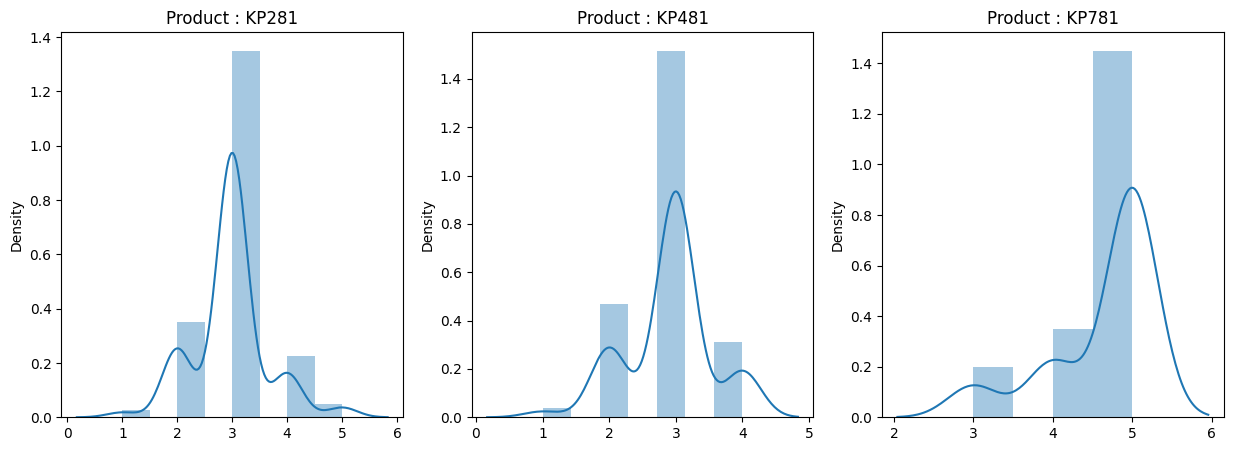

In [15]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.distplot(ax = axes[0], x=df281['Fitness'])
axes[0].set_title('Product : KP281')

sns.distplot(ax = axes[1], x=df481['Fitness'])
axes[1].set_title('Product : KP481')

sns.distplot(ax = axes[2], x=df781['Fitness'])
axes[2].set_title('Product : KP781')


> # Lets find the correlation

In [16]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [17]:
encoded_df = pd.get_dummies(df, columns = ['Product', 'Gender', 'MaritalStatus'])
encoded_df.head()

,Age,Education,Usage,Fitness,Income,Miles,Product_KP281,Product_KP481,Product_KP781,Gender_Female,Gender_Male,MaritalStatus_Partnered,MaritalStatus_Single
0,18,14,3,4,29562,112,1,0,0,0,1,0,1
1,19,15,2,3,31836,75,1,0,0,0,1,0,1
2,19,14,4,3,30699,66,1,0,0,1,0,1,0
3,19,12,3,3,32973,85,1,0,0,0,1,0,1
4,20,13,4,2,35247,47,1,0,0,0,1,1,0


<AxesSubplot:>

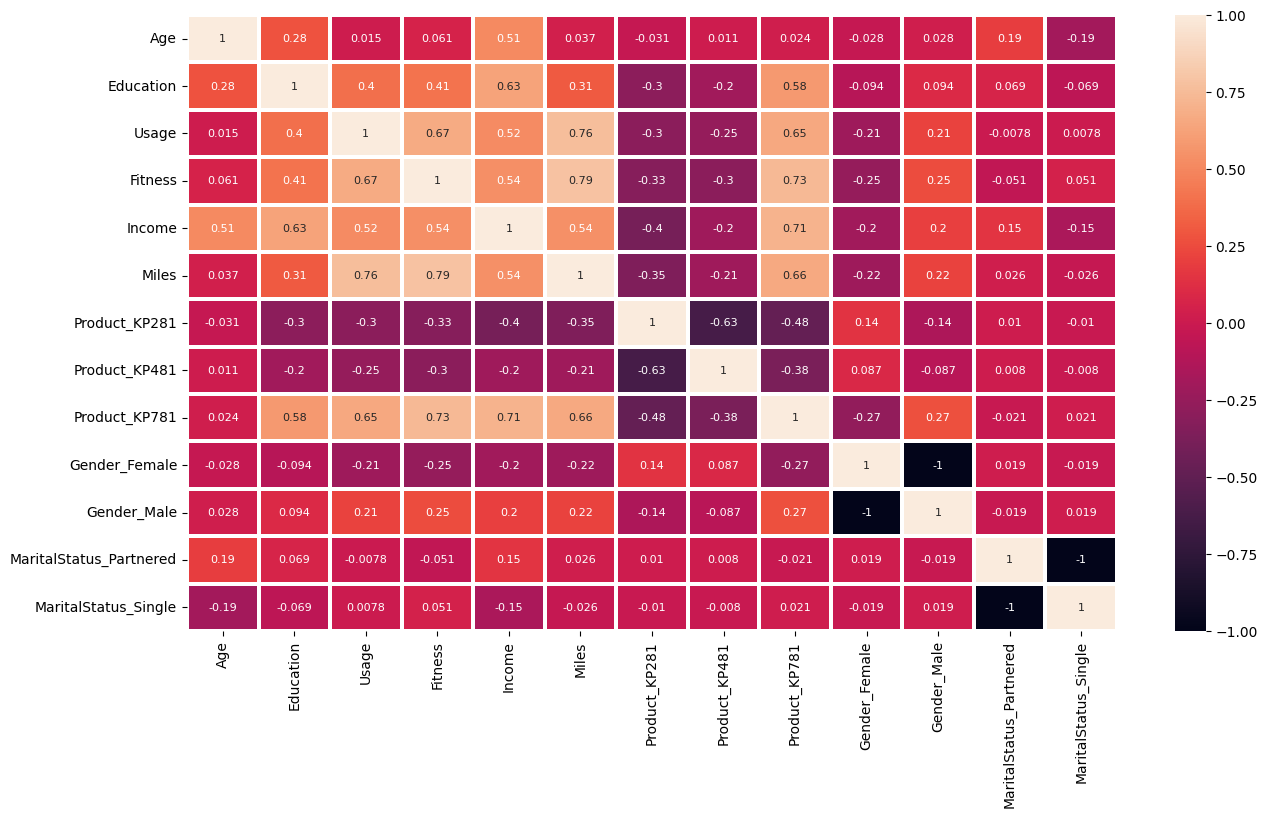

In [18]:
corr = encoded_df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot = True, annot_kws = {'fontsize' : 8},linewidths = 1.5)

In [19]:
corr[['Product_KP281']].sort_values(by = ['Product_KP281'], ascending = False)

,Product_KP281
Product_KP281,1.000000
Gender_Female,0.140848
MaritalStatus_Partnered,0.010120
MaritalStatus_Single,-0.010120
Age,-0.030858
Gender_Male,-0.140848
Education,-0.296591
Usage,-0.304312
Fitness,-0.326090
Miles,-0.352915


In [20]:
corr[['Product_KP481']].sort_values(by = ['Product_KP481'], ascending = False)

,Product_KP481
Product_KP481,1.000000
Gender_Female,0.087489
Age,0.011347
MaritalStatus_Partnered,0.008001
MaritalStatus_Single,-0.008001
Gender_Male,-0.087489
Education,-0.199761
Income,-0.203871
Miles,-0.208650
Usage,-0.254198


In [21]:
corr[['Product_KP781']].sort_values(by = ['Product_KP781'], ascending = False)

,Product_KP781
Product_KP781,1.000000
Fitness,0.734472
Income,0.705368
Miles,0.658401
Usage,0.651956
Education,0.581002
Gender_Male,0.267549
Age,0.024017
MaritalStatus_Single,0.021168
MaritalStatus_Partnered,-0.021168


> `So basically for Products KP281 and KP481, features like, Fitnes, Income, Miles are slighltly negatively correlated; where as the same features are pretty much highly correlated with the product KP781. It can be said , serious users with high income are going for the product KP781 only. And naturally education directly affect the Income column, so it also has above 50% correlation with the product KP781.`

Now lets also look at the dependencies in between the independent fetures.

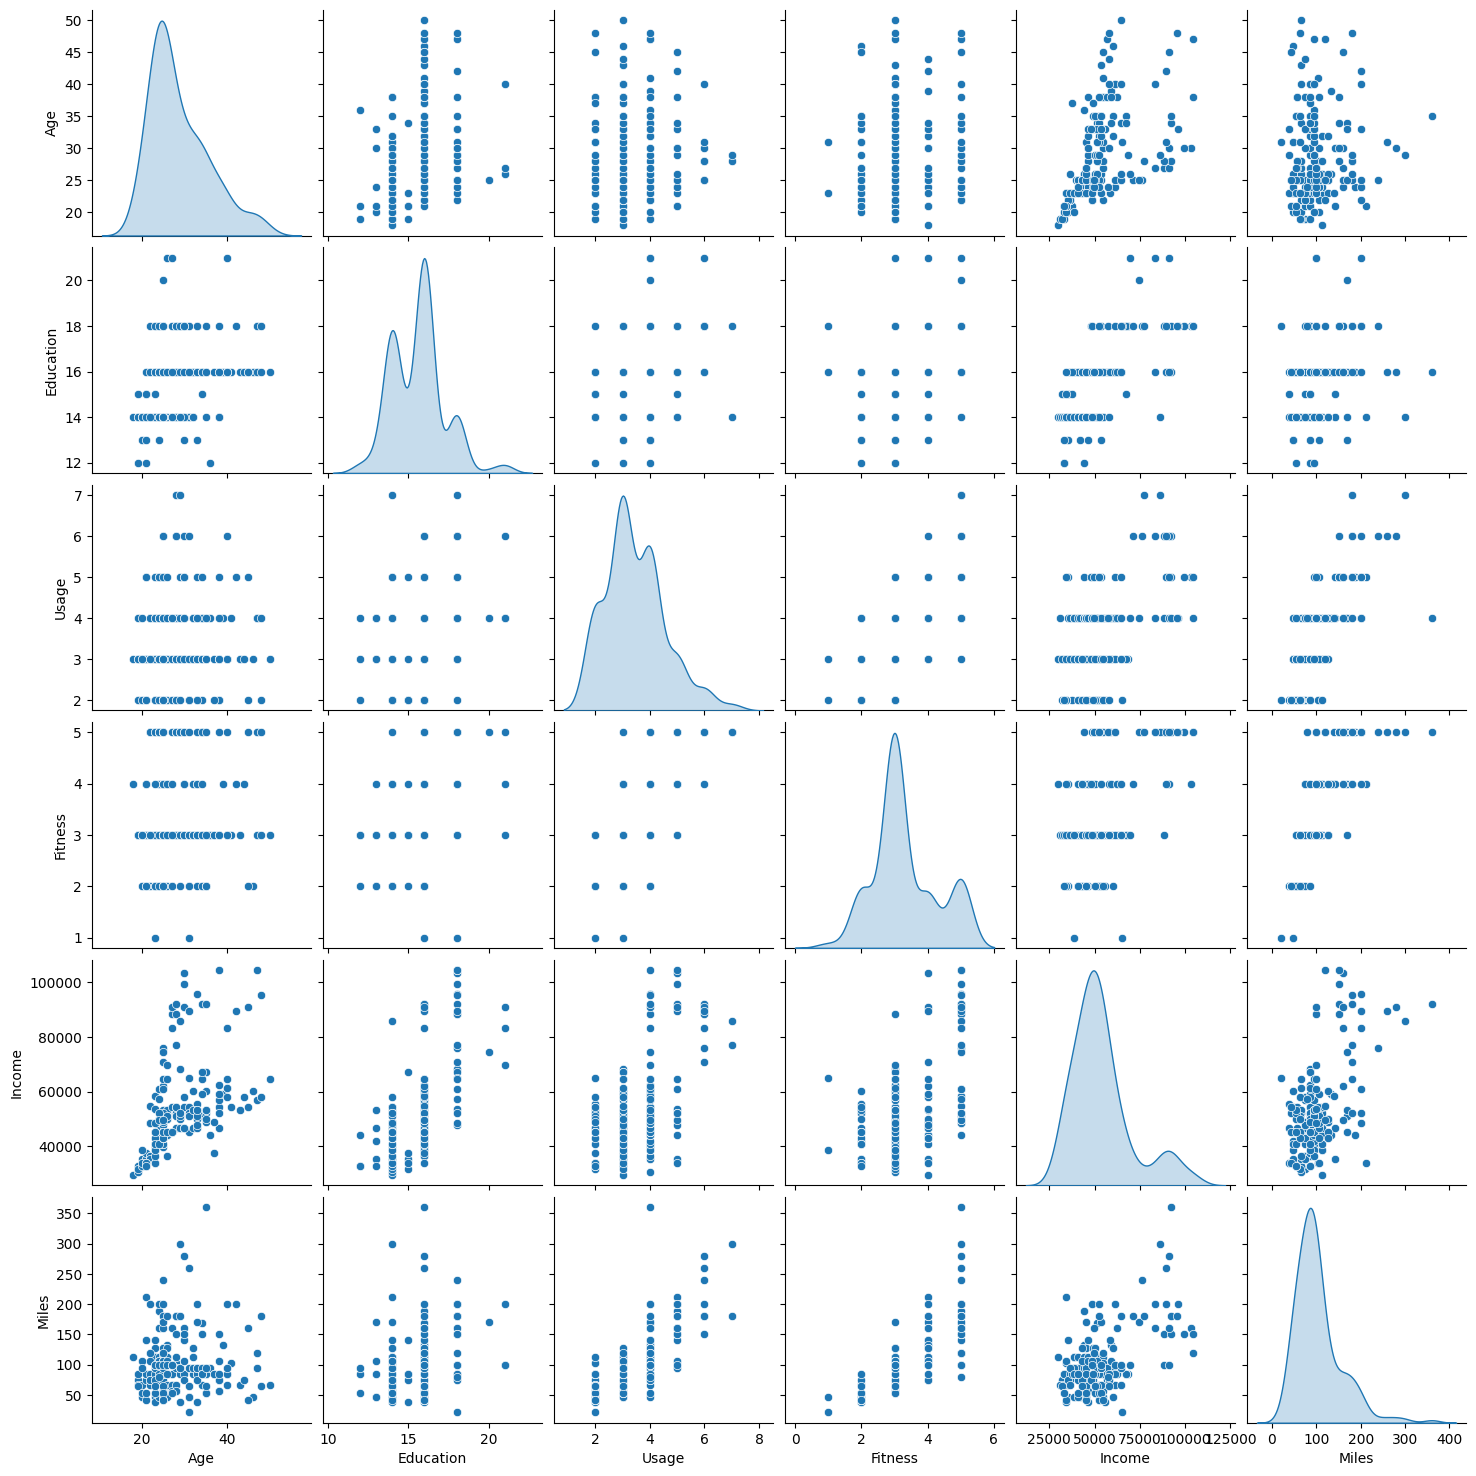

In [24]:
sns.pairplot(data = df, diag_kind = 'kde')

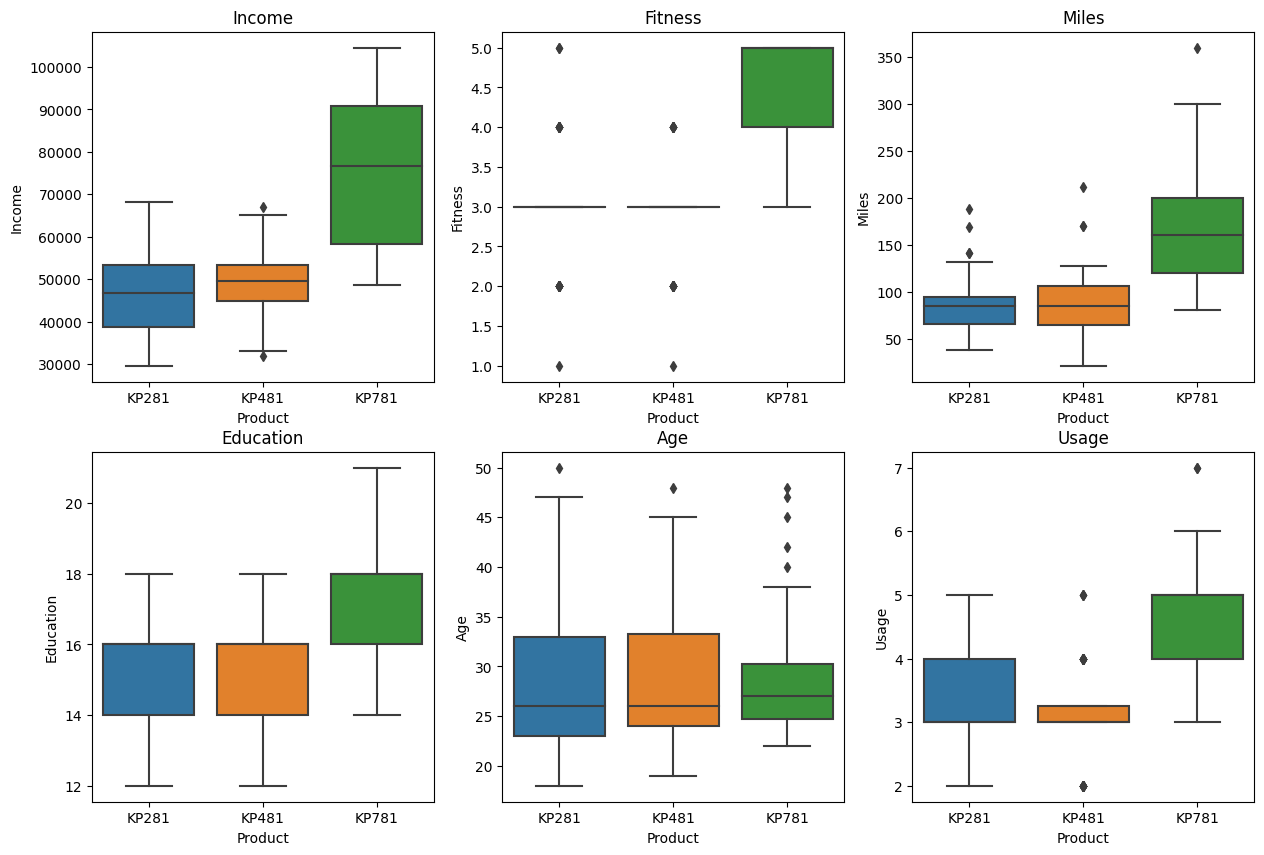

In [72]:
fig, ax = plt.subplots(2,3, figsize=(15,10))
sns.boxplot(ax = ax[0,0], data = df, whis = 1.5, x = 'Product', y = 'Income')
ax[0,0].title.set_text('Income') 
sns.boxplot(ax = ax[0,1], data = df, whis = 1.5,  x = 'Product', y = 'Fitness')
ax[0,1].title.set_text('Fitness')
sns.boxplot(ax = ax[0,2], data = df, whis = 1.5, x = 'Product', y = 'Miles')
ax[0,2].title.set_text('Miles')
sns.boxplot(ax = ax[1,0], data = df, whis = 1.5, x = 'Product', y = 'Education')
ax[1,0].title.set_text('Education')
sns.boxplot(ax = ax[1,1], data = df, whis = 1.5, x = 'Product', y = 'Age')
ax[1,1].title.set_text('Age')
sns.boxplot(ax = ax[1,2], data = df, whis = 1.5, x = 'Product', y = 'Usage')
ax[1,2].title.set_text('Usage')

> - So, usually, bellow 30 persons are going for the product KP781, though there is a few outliers for 40 to 50 years of age range.
> - People who are mostly looking for less hardcore exerise are looking for KP281 and KP481.
> - From people who are real good at their self rated fitness scale to people, not fit at all, all types of people seems to go for the produts KP281 and KP481.

> ## Income and Age dependencies of the different Products

<AxesSubplot:xlabel='Income', ylabel='Age'>

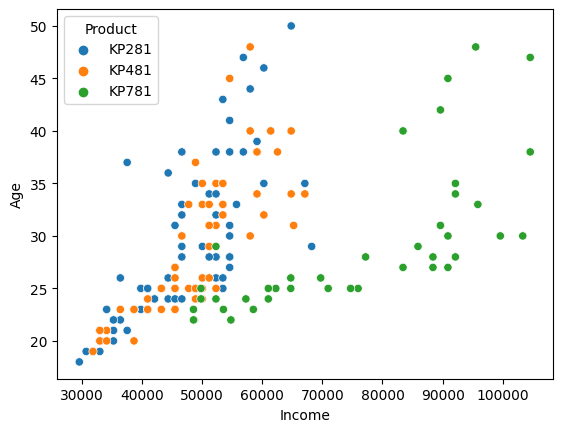

In [37]:
sns.scatterplot(data=df, x = 'Income', y='Age', hue='Product')

> So, it can be seen clearly that KP781 is not that of a age dependent but rather extremely Income dependent.
> But for other two products KP281 and KP481, they are more likely for people with a large age range and with low income.

> ## Motivations of people for different Products

<AxesSubplot:xlabel='Usage', ylabel='Miles'>

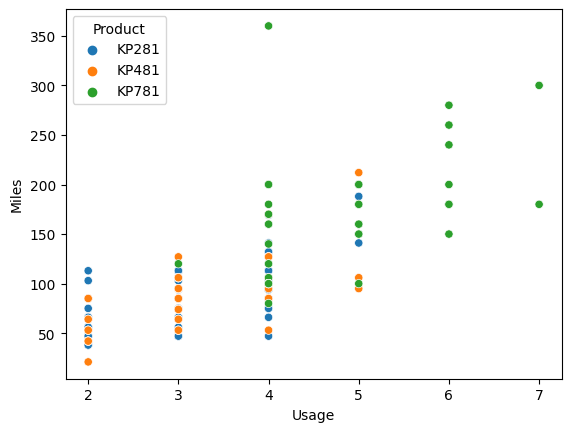

In [38]:
sns.scatterplot(data=df, x = 'Usage', y='Miles', hue='Product')

> This plot clarifies the fact more that, people with serious intention and motivation are more likely to go for KP781. while rest of the people are going for other two products

> ## Insights and Recommendations

- So, for lower income people are clearly going for KP281 and KP481. But among these two products, both are geenrating same amount of revenue pretty much as per the dataset. They are sort of behaving as same products with slightly different prices. So, may be focusing on a completely different product in any price range, be it loer or higher, would be more benefitial instead of investing in 'almost' same two products.
- product KP281 or KP481 are mostly popular among lower income and younger people mainly. So, marketting these two products among school and college students more instead of product KP781 would be more benefitial. Similarly, for people who are already in the customer base of the company, promotion of KP781 ould be benefitial. There may be discount offers or coupons, which can be used to promote the product KP781 among the customer base would be benefitial.
- For newcomers, clearly the product KP281 or KP481 would should be promoted more and more. 
- So, basically to increase the customer base, the product KP281 or KP481 would do amazing work, and for the exiting customer base, the product KP781 wowuld do the best work.